In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import load_img


In [2]:
label = []
path = []
for i in os.listdir('/content/drive/MyDrive/dogs and cats/PetImages'):
  for j in os.listdir('/content/drive/MyDrive/dogs and cats/PetImages/'+i):
    if (i == 'Cat'):
      label.append(1)
    elif (i=='Dog') :
      label.append(0)
    path.append(os.path.join('/content/drive/MyDrive/dogs and cats/PetImages',i,j))


In [3]:
df = pd.DataFrame()
df['path']= path
df['label'] = label

In [ ]:
df.head(10)

In [4]:
delete =[]
for i in df['path']:
  if 'jpg' not in i:
    print(i)
    delete.append(i)
    

/content/drive/MyDrive/dogs and cats/PetImages/Dog/Thumbs.db
/content/drive/MyDrive/dogs and cats/PetImages/Cat/Thumbs.db


In [5]:
for i in delete:
  df = df[df['path']!= i ]

In [6]:
df.shape

(25020, 2)

In [7]:
df['label'] = df['label'].astype('str')

In [8]:
df1 = df['path']

In [9]:
df2 = df.loc[df['label']==1]
df2.shape

(0, 2)

In [10]:
df2 = df2.reset_index(drop = True)

In [11]:
df8 = df2['path']

In [12]:
df4 = df2['path']

In [13]:
df3 = df.loc[df['label']==0]
df3.shape

(0, 2)

In [14]:
df3 = df3.reset_index(drop = True)
df3.head(10)

,path,label


In [16]:
reset.head()

NameError: ignored

In [15]:
df6 = df3['path']
df6

Series([], Name: path, dtype: object)

In [16]:
random = np.random.choice(range(12511),15, replace =True)

In [17]:
reset = df.reset_index(drop = True)


In [20]:
import PIL
for i in reset['path']:
  try:
    img = PIL.Image.open(i)
  except:
    print(i)


/content/drive/MyDrive/dogs and cats/PetImages/Dog/11702.jpg
/content/drive/MyDrive/dogs and cats/PetImages/Cat/666.jpg


In [18]:
reset = reset.loc[reset['path']!= '/content/drive/MyDrive/dogs and cats/PetImages/Dog/11702.jpg']
reset = reset.loc[reset['path']!= '/content/drive/MyDrive/dogs and cats/PetImages/Cat/666.jpg']

In [19]:
random

array([11392,   627, 11914, 11019,  3980,  7735,  3797,  8842, 12380,
       10406, 11041,  3824,  6042,   171,  2611])

In [20]:
reset.head()

,path,label
0,/content/drive/MyDrive/dogs and cats/PetImages...,0
1,/content/drive/MyDrive/dogs and cats/PetImages...,0
2,/content/drive/MyDrive/dogs and cats/PetImages...,0
3,/content/drive/MyDrive/dogs and cats/PetImages...,0
4,/content/drive/MyDrive/dogs and cats/PetImages...,0


In [ ]:
plt.figure(figsize=(25,25))
for i,j in enumerate(random):
    plt.subplot(5,5,i+1)
    img = load_img(df6[j])
    array = np.array(img)
    plt.imshow(array)

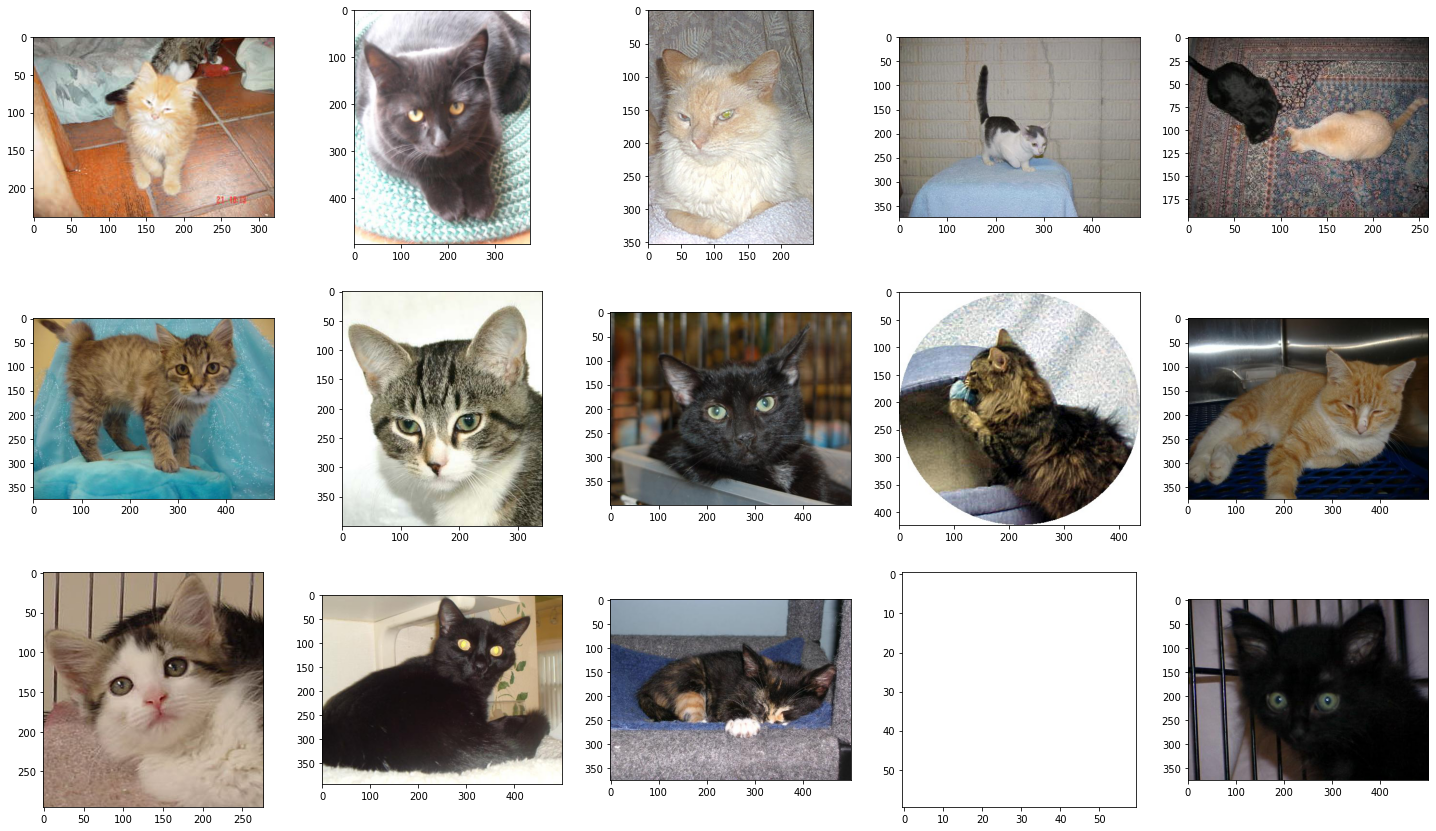

In [ ]:
plt.figure(figsize=(25,25))
for i ,j in enumerate (random):
  plt.subplot(5,5,i+1)
  img1 = load_img(df8[j])
  array1 = np.array(img1)
  plt.imshow(array1)



In [22]:
path = df.drop(columns = 'path',axis =1)
label1 = df['label']

In [23]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(reset, test_size = 0.25)

In [24]:
from keras.preprocessing.image import ImageDataGenerator
data = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 0.2,
    shear_range=0.4,
    zoom_range= 0.3,
    horizontal_flip= True,
    fill_mode ='nearest'
)

In [25]:
data1 = data.flow_from_dataframe(train, x_col ='path',y_col = 'label',batch_size = 128, target_size = (128,128),class_mode = 'binary')

Found 18763 validated image filenames belonging to 2 classes.


In [26]:
from keras.preprocessing.image import ImageDataGenerator
val_model = ImageDataGenerator(rescale = 1./255)

data2 = val_model. flow_from_dataframe(test,x_col ='path',y_col = 'label', batch_size = 128, target_size = (128,128),class_mode='binary')



Found 6255 validated image filenames belonging to 2 classes.


In [27]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model = Sequential([
                     Conv2D(16,kernel_size = (3,3),input_shape= (128,128,3),activation = 'relu'),
                     MaxPool2D(pool_size = (2,2)),
                     Conv2D(32,kernel_size =(3,3),activation = 'relu'),
                     MaxPool2D(pool_size = (2,2)),
                     Conv2D(64,kernel_size =(3,3),activation = 'relu'),
                     MaxPool2D(pool_size = (2,2)),
                     Flatten(),
                     Dense(512, activation ='relu'),
                     Dense(1,activation = 'sigmoid')
])


In [28]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [30]:
history =model.fit(data1,epochs = 5,validation_data=data2)

Epoch 1/5
147/147 [==============================] - 5365s 37s/step - loss: 0.6339 - accuracy: 0.6380 - val_loss: 0.6118 - val_accuracy: 0.6763
Epoch 2/5
147/147 [==============================] - 436s 3s/step - loss: 0.5439 - accuracy: 0.7239 - val_loss: 0.5825 - val_accuracy: 0.7185
Epoch 3/5
147/147 [==============================] - 443s 3s/step - loss: 0.4904 - accuracy: 0.7622 - val_loss: 0.4495 - val_accuracy: 0.7954
Epoch 4/5
147/147 [==============================] - 435s 3s/step - loss: 0.4538 - accuracy: 0.7839 - val_loss: 0.4314 - val_accuracy: 0.8145
Epoch 5/5
147/147 [==============================] - 430s 3s/step - loss: 0.4277 - accuracy: 0.7986 - val_loss: 0.4298 - val_accuracy: 0.8099


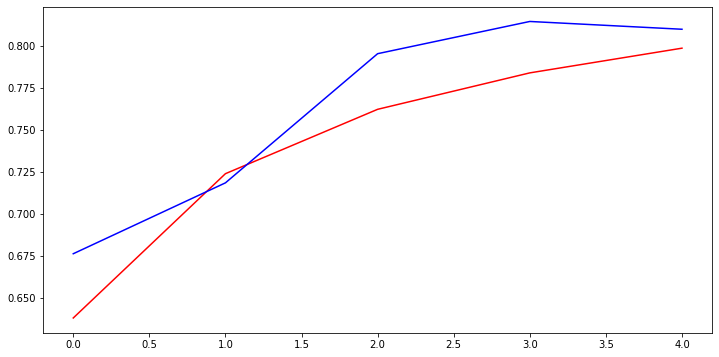

In [40]:
epocs = range(5)
accuracy =history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.figure(figsize =(12,6))
plt.plot(epocs,  accuracy,label = 'accuracy',c ='red' )
plt.plot(epocs,  val_accuracy,label = 'accuracy',c ='blue' )

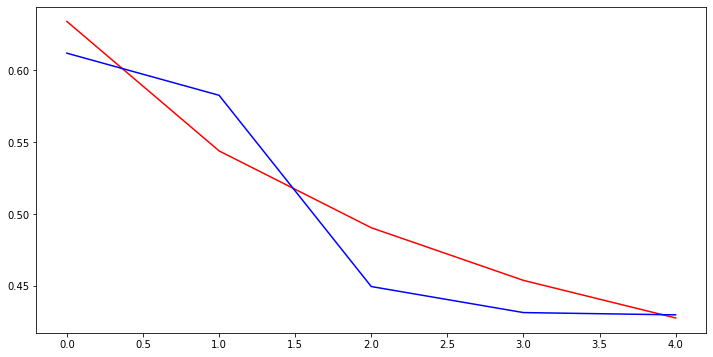

In [41]:
epocs = range(5)
loss =history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize =(12,6))
plt.plot(epocs,loss,label = 'loss',c ='red' )
plt.plot(epocs,val_loss,label = 'val_loss',c ='blue' )